In [1]:
# !pip install voila
# !jupyter serverextension enable --user voila

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
learn_inf = load_learner('export.pkl')

/home/bellergy/Documents/fastai-notebook/.venv-1/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [4]:
btn_upload = widgets.FileUpload()
btn_upload = SimpleNamespace(data = ['images/02/test/image-01.jpg'])

In [5]:
img = PILImage.create(btn_upload.data[-1])

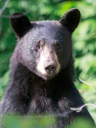

In [6]:
out_pl = widgets.Output()
out_pl.clear_output()
display(img.to_thumb(128,128))


In [7]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


In [ ]:
btn_run = widgets.Button(description='Classify')


In [9]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [10]:
btn_upload = widgets.FileUpload()

In [11]:
VBox([widgets.Label('Select your bear!'), 
            btn_upload, btn_run, out_pl, lbl_pred])